# Decision Tree and Random Forest Classifier Assignment


## 1. Business Understanding
The objective of this assignment is to develop an automated system for detecting phishing websites based on easily obtainable website characteristics. Phishing attacks represent one of the most prevalent cybersecurity threats, where malicious actors create fraudulent websites to steal sensitive user information such as login credentials, credit card numbers, and personal data.

## 2. Data Understanding



In this dataset 30 features and one target variable. The dataset does not contain any missing values or outliers. The target variable is 'Result' which indicates if the website is phishing (-1) or legitimate (1). The suspicious value (0) is only used in some features and not in the target variable. For more information about the dataset and  its features, look at the Phishing Websites Features documentation in the dataset (https://archive.ics.uci.edu/dataset/327/phishing+websites).

In [2]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# fetch dataset
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframe)
X = phishing_websites.data.original
X

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


## 3. Data Preparation


Separating learning and training groups

In [3]:
y = X['result']
X = X.drop(columns=['result'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## 4. Modeling


### Decision Tree Classifier


Finding optimal complexity for this Decision Tree model to prevent overfitting and printing out results for each Max depth value used.

Max Depth: 2, Train Accuracy: 0.9081, Test Accuracy: 0.9020
Max Depth: 3, Train Accuracy: 0.9195, Test Accuracy: 0.9117
Max Depth: 4, Train Accuracy: 0.9204, Test Accuracy: 0.9120
Max Depth: 5, Train Accuracy: 0.9247, Test Accuracy: 0.9180
Max Depth: 6, Train Accuracy: 0.9354, Test Accuracy: 0.9201
Max Depth: 7, Train Accuracy: 0.9430, Test Accuracy: 0.9246
Max Depth: 8, Train Accuracy: 0.9495, Test Accuracy: 0.9331
Max Depth: 9, Train Accuracy: 0.9546, Test Accuracy: 0.9346
Max Depth: 10, Train Accuracy: 0.9621, Test Accuracy: 0.9409
Max Depth: 11, Train Accuracy: 0.9677, Test Accuracy: 0.9403
Max Depth: 12, Train Accuracy: 0.9727, Test Accuracy: 0.9430
Max Depth: 13, Train Accuracy: 0.9775, Test Accuracy: 0.9475
Max Depth: 14, Train Accuracy: 0.9820, Test Accuracy: 0.9548
Max Depth: 15, Train Accuracy: 0.9842, Test Accuracy: 0.9548
Max Depth: 16, Train Accuracy: 0.9858, Test Accuracy: 0.9560
Max Depth: 17, Train Accuracy: 0.9875, Test Accuracy: 0.9563
Max Depth: 18, Train Accuracy: 0

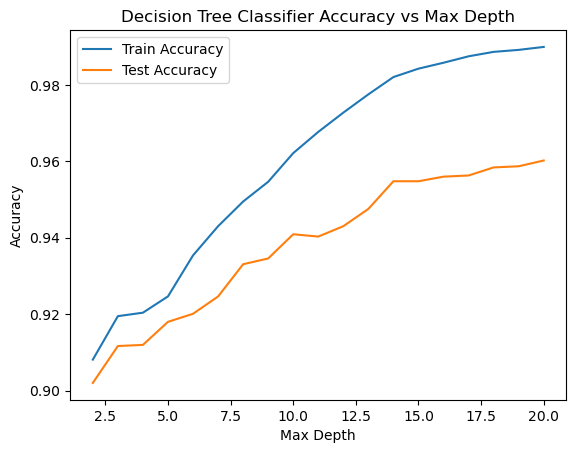

In [4]:
train_acc = []
test_acc = []
for depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=123)
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    print (f"Max Depth: {depth}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

plt.plot(range(2, 21), train_acc, label='Train Accuracy')
plt.plot(range(2, 21), test_acc, label='Test Accuracy') 
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy vs Max Depth')
plt.legend()
plt.show()

Visualizing Decision Tree

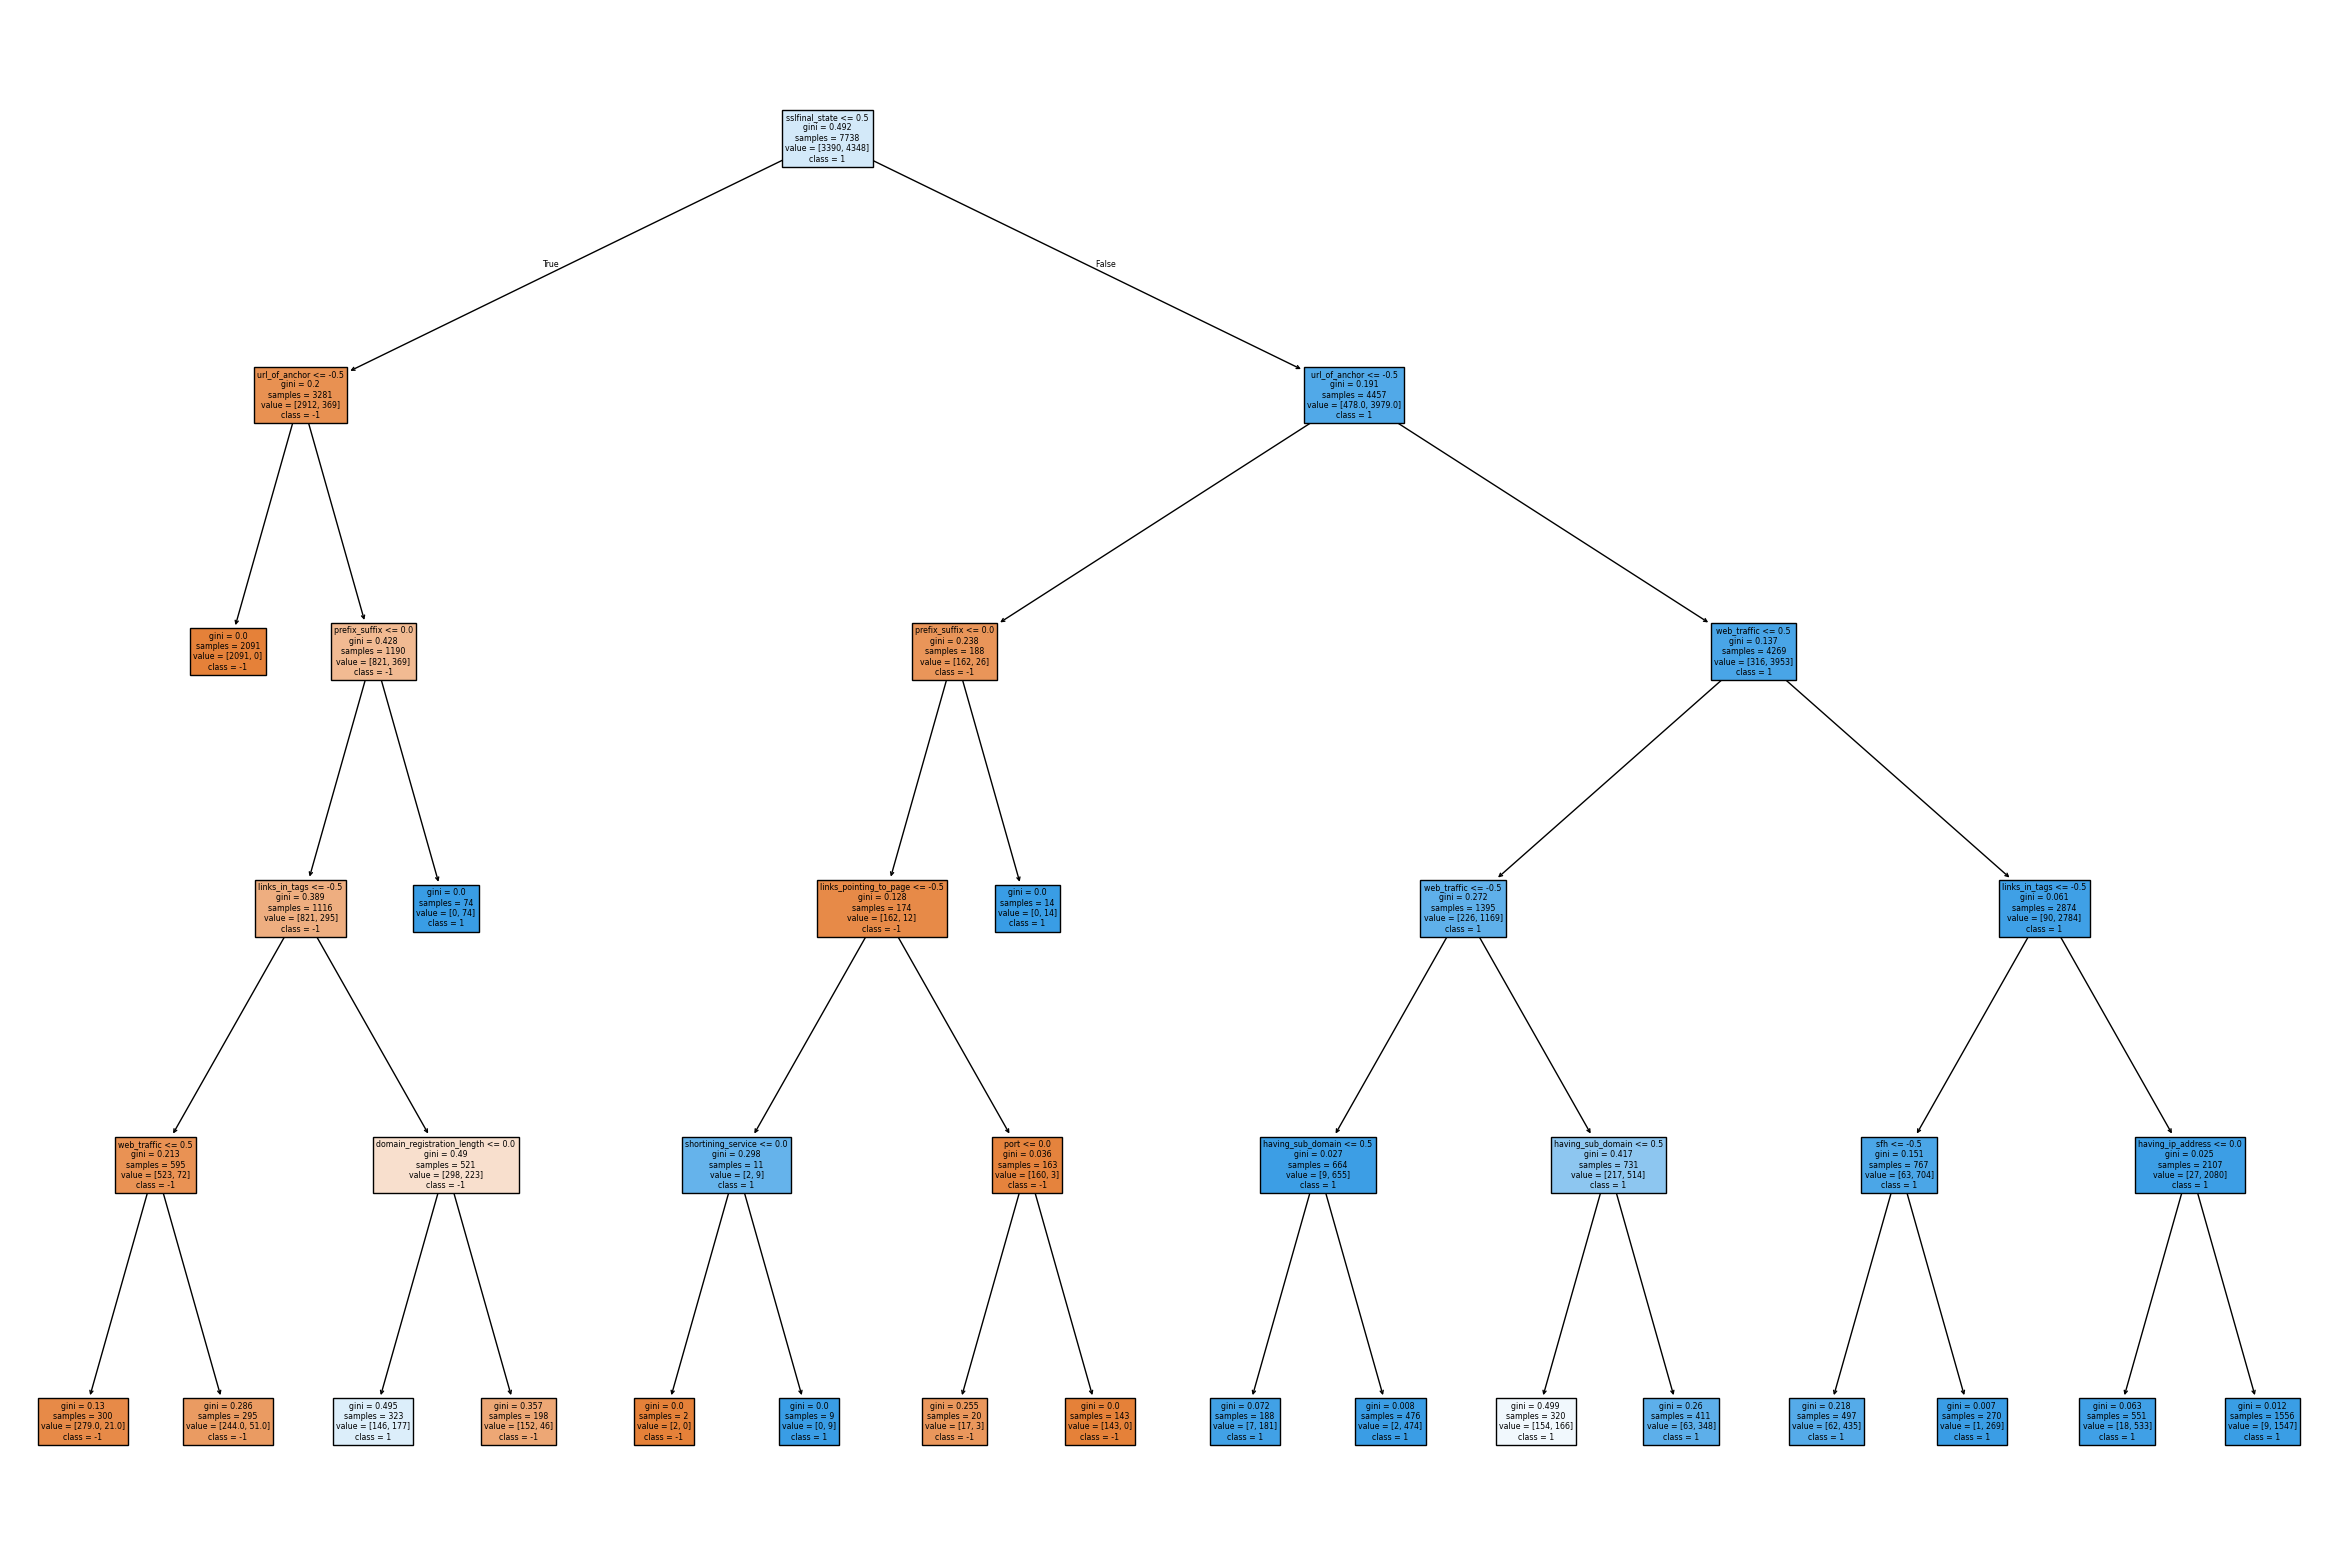

In [5]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=123)
dt_model.fit(X_train, y_train)

fig = plt.figure(figsize=(30,20))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['-1', '1'])
plt.show()

Now we tune the max_features hyperparameter of Random Forest to find the best setting for model performance.
By testing values from 0.3 to 1.0, it determines how many clues each individual tree is allowed to consider when making a split.

In [6]:

for max_features in np.arange(0.3, 1.01, 0.1):
    max_features = round(max_features, 1)
    rf_model = RandomForestClassifier(n_estimators=100, max_samples=0.7, max_features=max_features, random_state=123)
    rf_model.fit(X_train, y_train)
    cross_val_score(rf_model, X_train, y_train, cv=5)
    print(f"Random Forest Classifier cross val score with max_features={max_features}: {cross_val_score(rf_model, X_train, y_train, cv=5).mean():.4f}")

Random Forest Classifier cross val score with max_features=0.3: 0.9661
Random Forest Classifier cross val score with max_features=0.4: 0.9646
Random Forest Classifier cross val score with max_features=0.5: 0.9658
Random Forest Classifier cross val score with max_features=0.6: 0.9655
Random Forest Classifier cross val score with max_features=0.7: 0.9641
Random Forest Classifier cross val score with max_features=0.8: 0.9643
Random Forest Classifier cross val score with max_features=0.9: 0.9637
Random Forest Classifier cross val score with max_features=1.0: 0.9641


0.3 is the best one so far

Tuning max_samples hyperparameter

In [7]:
for max_samples in np.arange(0.3, 1.01, 0.1):
    max_samples = round(max_samples, 1)
    rf_model = RandomForestClassifier(n_estimators=100, max_samples=max_samples, max_features=0.3, random_state=123)
    rf_model.fit(X_train, y_train)
    cross_val_score(rf_model, X_train, y_train, cv=5)
    print(f"Random Forest Classifier cross val score with max_samples={max_samples}: {cross_val_score(rf_model, X_train, y_train, cv=5).mean():.4f}")

Random Forest Classifier cross val score with max_samples=0.3: 0.9625
Random Forest Classifier cross val score with max_samples=0.4: 0.9652
Random Forest Classifier cross val score with max_samples=0.5: 0.9650
Random Forest Classifier cross val score with max_samples=0.6: 0.9664
Random Forest Classifier cross val score with max_samples=0.7: 0.9661
Random Forest Classifier cross val score with max_samples=0.8: 0.9660
Random Forest Classifier cross val score with max_samples=0.9: 0.9661
Random Forest Classifier cross val score with max_samples=1.0: 0.9658


0.6 is the best one so far.

Tuning n_estimators hyperparameter

In [8]:
for n_estimators in range(50, 301, 50):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_samples=0.6, max_features=0.3, random_state=123)
    rf_model.fit(X_train, y_train)
    cross_val_score(rf_model, X_train, y_train, cv=5)
    print(f"Random Forest Classifier cross val score with n_estimators={n_estimators}: {cross_val_score(rf_model, X_train, y_train, cv=5).mean():.4f}")

Random Forest Classifier cross val score with n_estimators=50: 0.9664
Random Forest Classifier cross val score with n_estimators=100: 0.9664
Random Forest Classifier cross val score with n_estimators=150: 0.9670
Random Forest Classifier cross val score with n_estimators=200: 0.9665
Random Forest Classifier cross val score with n_estimators=250: 0.9669
Random Forest Classifier cross val score with n_estimators=300: 0.9663


Based on the results a random forest model with 150 estimators, 30% max_features and 60% max_samples was decided as the final model. 

In [9]:
rf_model = RandomForestClassifier(n_estimators=150, max_samples=0.6, max_features=0.3, random_state=123)
rf_model.fit(X_train, y_train)
cross_val_score = cross_val_score(rf_model, X_train, y_train, cv=5).mean()
print(f"Final Random Forest Classifier cross val score: {cross_val_score:.4f}")

Final Random Forest Classifier cross val score: 0.9670


## 5. Evaluation


Both the Decision Tree and Random Forest classifier metrics are shown below.

Decision Tree Classifier Results:
              precision    recall  f1-score   support

          -1       0.96      0.85      0.90      1508
           1       0.89      0.97      0.93      1809

    accuracy                           0.92      3317
   macro avg       0.93      0.91      0.92      3317
weighted avg       0.92      0.92      0.92      3317



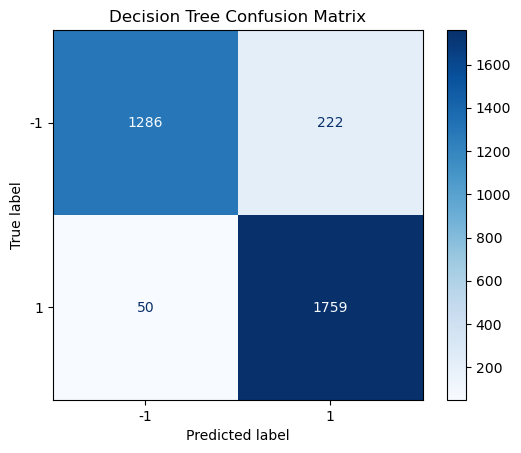

In [10]:
y_pred_tree = dt_model.predict(X_test)
print('Decision Tree Classifier Results:')
print(classification_report(y_test, y_pred_tree))
cm = confusion_matrix(y_test, y_pred_tree)
cmd = ConfusionMatrixDisplay(cm, display_labels=['-1', '1'])
cmd.plot(values_format='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()


The Decision Tree achieves 92% accuracy, which is a respectable baseline. But the 85% recall for phishing detection shows a significant security problem where 15% of phishing attempts go undetected.


### Random Forest Classifier
Below are the results for the Random Forest Classifier.

Random Forest Classifier Results:
              precision    recall  f1-score   support

          -1       0.98      0.95      0.96      1508
           1       0.96      0.98      0.97      1809

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



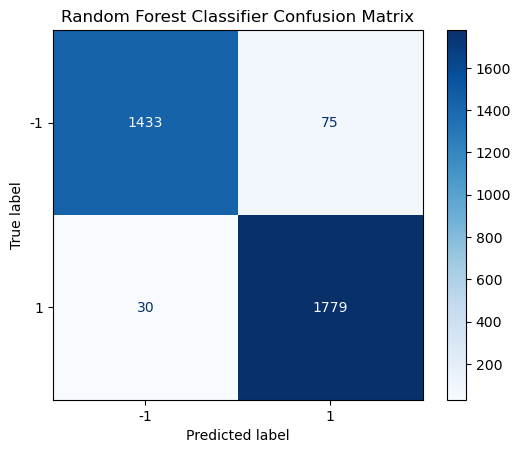

In [11]:
y_pred_forest = rf_model.predict(X_test)
print('Random Forest Classifier Results:')
print(classification_report(y_test, y_pred_forest))
cm = confusion_matrix(y_test, y_pred_forest, labels=rf_model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=rf_model.classes_)
cmd.plot(values_format='d',cmap ='Blues')

plt.title('Random Forest Classifier Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The Random Forest classifier achieves much better performance with 97% accuracy in detecting phishing websites compared to 92% for Decision Tree. 75 missed phishing sites vs 222 with Decision Tree. To summarize: 95% recall for phishing, 98% precision for phishing, 98% recall for legitimate sites

## 6. Deployment

Decision Tree model works well, but not ready at this point for deployment. 85% recall for phishing detection is a significant security problem, which means that 15% of phishing attempts go undetected. This model requires improvement before deployment.



Random Forest, on the other hand, is deployment ready, but we should keep in mind that third training set was not used.

## 7. Manual Phishing Analysis

Step 1: SSL Certificate (SSLfinal_State)
Check: Look for padlock in address bar and verify HTTPS
Decision:

NO valid SSL (HTTP or security warning) → PHISHING (-1)
Valid SSL (HTTPS with valid cert) → Proceed to Step 2


Step 2: Anchor Links (URL_of_Anchor)
Check:

Press F12, hover over page links
See if links stay on same domain or redirect externally

Decision:

Links point to SAME domain → Proceed to Step 3
Links point to EXTERNAL domains → PHISHING (-1)


Step 3: IP Address (having_IP_Address)
Check: Does URL use IP address or domain name?
Examples:

Domain: https://paypal.com good
IP: https://220.136.118.239 bad

Decision:

Uses IP address → PHISHING (-1)
Uses domain name → Proceed to Step 4


Step 4: Dash in Domain (Prefix_Suffix)
Check: Look for dash symbol (-) in domain name
Examples:

Clean: PayPal.com good
Suspicious: secure-paypal.com bad

Decision:

Domain has dash (-) → PHISHING (-1)
No dash → Proceed to Step 5


Step 5: Domain Registration (Domain_registration_length)
Check:

Use WHOIS lookup (who.is)
Check registration length in years

Decision:

Registered ≤ 1 year → PHISHING (-1) 
Registered > 1 year → LEGITIMATE (1) 